In [262]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import csv
import pandas as pd
import socket
import datetime
print('Current workstations: '+str(socket.gethostname()))
%matplotlib inline

if socket.gethostname()=='Osian':
    base_dir="/home/caplarn/Documents/Variability/PTFBeatriz/"
else:
    base_dir="/export/data1/caplarn/Documents/Variability/PTFBeatriz/"
os.chdir(base_dir)   
print('Current time: '+str(datetime.datetime.now()))            
    

Current workstations: iapetus
Current time: 2017-04-17 13:25:56.953181


In [246]:
df = pd.read_csv('BertemesAll8_DR7.csv', delimiter=',')

In [247]:
dfoutput=pd.DataFrame(df,columns=['ra','dec'])

In [248]:
# This is a way to create ipac consistent table. More natural options would be to use astropy
dfoutput.insert(0,'a',"")
dfoutput.insert(2,'b',"")
dfoutput.insert(3,'c',"")
dfoutput.insert(4,'d',"")
dfoutput.insert(5,'e',"")
dfoutput.insert(6,'f',"")

In [249]:
dfoutputShort=dfoutput[:50]

In [250]:
dfoutputShort

,a,ra,b,c,d,e,f,dec
0,,148.927932,,,,,,58.647339
1,,320.413162,,,,,,-6.411178
2,,316.121264,,,,,,-5.418024
3,,325.507513,,,,,,-6.556515
4,,326.370560,,,,,,-6.752017
5,,229.306585,,,,,,5.869906
6,,151.480889,,,,,,6.446596
7,,159.677922,,,,,,6.902334
8,,131.088100,,,,,,5.019645
9,,134.908642,,,,,,5.391217


In [264]:
len(dfoutput)

1884

In [258]:
dfoutput.to_csv('BertemesAll8_DR7ForIPacFull.tbl', sep=' ',header=False,index=False, float_format='%.5f')

In [259]:
def line_prepender(filename, line):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line.rstrip('\r\n') + '\n' + content)

In [260]:
line_prepender('BertemesAll8_DR7ForIPacFull.tbl','|ra          |dec          |')

In [ ]:
# go to https://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?mission=irsa&submit=Select&projshort=PTF
# Select "PTF Lightcurve Table"
# upload generated table
# cone search radius = 1 arcsec
# if needed table validator at: http://irsa.ipac.caltech.edu/applications/TblValidator/
# for full input table of 1884 objects it took 45 min and 43 sec to get the result; perhaps it can be faster if less 
# collumns are asked for or if one asks for just single match to radius

# Analyzing single light curve and testign code

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import csv
import pandas as pd
import datetime
import socket
print(socket.gethostname())
%matplotlib inline

if socket.gethostname()=='Osian':
    base_dir="/home/caplarn/Documents/Variability/PTFBeatriz/"
else:
    base_dir="/export/data1/caplarn/Documents/Variability/PTFBeatriz/"
    
print('Current time: '+str(datetime.datetime.now()))        

iapetus
Current time: 2017-04-17 12:07:44.938097


In [33]:
def cleaning_LC(SingleLC):
    #Take only the closest source to the input 
    SingleLC[SingleLC['dist_x']==np.min(SingleLC['dist_x'])]
    #Taking only red filter 
    SingleLCClean1=SingleLC[SingleLC['fid']==2]
    #Taking only photometrically calibrated points
    SingleLCClean1=SingleLCClean1[SingleLCClean1['photcalflag']==1]
    #Taking only goodflag=1
    SingleLCClean1=SingleLCClean1[SingleLCClean1['goodflag']==1]
    return SingleLCClean1

from scipy.optimize import curve_fit
def fit_func(x, a, b):
    return a*x**2 + b

from scipy.signal import medfilt2d

In [3]:
import os
from astropy.io import ascii
lc_dir=base_dir+"LC_50_Test/"
os.chdir(lc_dir)
print(lc_dir)

/export/data1/caplarn/Resources/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/export/data1/caplarn/Documents/Variability/PTFBeatriz/LC_50_Test/


In [4]:
data = ascii.read('Apr16.tbl')

In [5]:
data[-1]

<Row -1 of table
 values=(48, 0.281616, 175.636516, 36, 71, 55821.5250672, 18.279, 0.049, 52252090014269, 36.478608, 70.691532, 2, 0, 2.475986e-07, 34, 25, 25, 18.281, 0.03, 18.303, 18.303, 18.311, 18.311, 0.049, 0.049, 10511532001884, 36.478626, 70.691537, 5225, 9, 55821.5262672, 919, 18.3, 20.631, 27.822, 2.05, 2.138, 0, 131072, 0, 1)
 dtype=[('cntr_01', '<i8'), ('dist_x', '<f8'), ('pang_x', '<f8'), ('ra_01', '<i8'), ('dec_01', '<i8'), ('obsmjd', '<f8'), ('mag_autocorr', '<f8'), ('magerr_auto', '<f8'), ('oid', '<i8'), ('ra', '<f8'), ('dec', '<f8'), ('fid', '<i8'), ('transient_flag', '<i8'), ('astrometricrms', '<f8'), ('nobs', '<i8'), ('ngoodobs', '<i8'), ('nbestobs', '<i8'), ('referencemag', '<f8'), ('referencemagerr', '<f8'), ('medianmag', '<f8'), ('bestmedianmag', '<f8'), ('meanmag', '<f8'), ('bestmeanmag', '<f8'), ('magrms', '<f8'), ('bestmagrms', '<f8'), ('sid', '<i8'), ('s_ra', '<f8'), ('s_dec', '<f8'), ('ptffield', '<i8'), ('ccdid', '<i8'), ('hmjd', '<f8'), ('nid', '<i8'), ('ma

In [156]:
np.median(SingleLC_Clean['referencemag'])

15.698

In [234]:
n=16
Invividual_LC_dir=lc_dir+str(n)+"/"
SingleLC=data[data['cntr_01']==n]
if len(SingleLC)>10:
    SingleLC_Clean=cleaning_LC(SingleLC)
    length_of_LC=len(SingleLC_Clean)
    print(len(SingleLC_Clean))
    if length_of_LC>10:
        if not os.path.exists(Invividual_LC_dir):
            os.makedirs(Invividual_LC_dir)


12


In [240]:
SingleLC['ra']

<MaskedColumn name='ra' unit=u'degrees' format=None description=None>
masked_array(data = [249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769 249.91769
 249.91769 249.91769 249.91769 249.91769 249.91769 249.917

In [235]:
ligth_curve=np.sort(np.c_[np.ma.getdata(SingleLC_Clean['mag_autocorr']),np.ma.getdata(SingleLC_Clean['obsmjd'])])
helplc=np.copy(ligth_curve[:,0])
ligth_curve[:,0]=ligth_curve[:,1]
ligth_curve[:,1]=helplc
ligth_curve_sort=ligth_curve[ligth_curve[:,0].argsort()]
#err=np.ma.getdata(SingleLC_Clean['referencemagerr'])
time_duration_of_LC=ligth_curve_sort[-1][0]-ligth_curve_sort[0][0]

In [236]:
from scipy.signal import medfilt2d
ligth_curve_sort=np.copy(ligth_curve_sort[ligth_curve_sort[:,1]>0])
TimesAndDifferencesFromMedian=np.column_stack((ligth_curve_sort[:,0],ligth_curve_sort[:,1]-medfilt(ligth_curve_sort[:,1],5)))
ligth_curve_sort_and_clean=ligth_curve_presort[np.abs(TimesAndDifferencesFromMedian[:,1])<0.5]

/export/data1/caplarn/Resources/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 24 but corresponding boolean dimension is 12


In [237]:
len(ligth_curve_sort[:,1]>0)

12

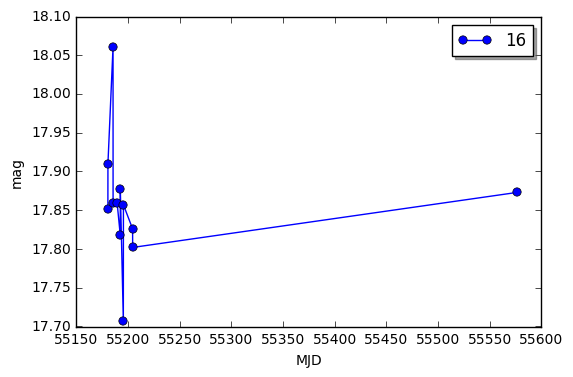

In [238]:
x_log=ligth_curve_sort_and_clean[:,0]
y_log=ligth_curve_sort_and_clean[:,1]
plt.errorbar(x_log, y_log,label=str(SingleLC_Clean[0][0]),marker='o')
legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('MJD')
plt.ylabel('mag')
plt.savefig(Invividual_LC_dir + 'LcWithError.png', bbox_inches='tight')
plt.show()
plt.close()

In [227]:
array_of_magnitude_differences = [];
for n in range(len(ligth_curve_sort_and_clean)-1):
    array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)

In [228]:
#log SF^2
Structure_Function_Log_Bins = [];
Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,5))
for n in range(1,len(Array_Of_Log_Limits)-1):
    single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
    Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
Structure_Function_Log_Bins=np.vstack(Structure_Function_Log_Bins)

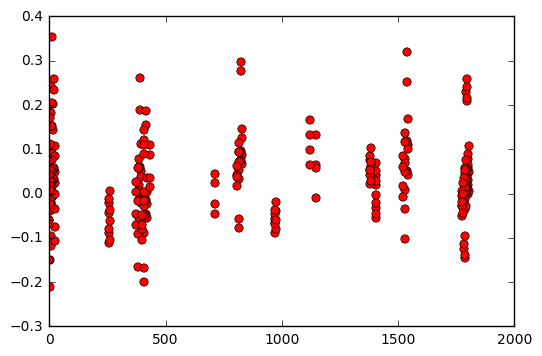

In [229]:
x_log=array_of_magnitude_differences[:,0]
y_log=array_of_magnitude_differences[:,1]
plt.plot(x_log,y_log,'ro')

In [230]:
x=Structure_Function_Log_Bins[:,0]
y=Structure_Function_Log_Bins[:,1]
x_log=np.log10(Structure_Function_Log_Bins[:,0])
y_log=np.log10(Structure_Function_Log_Bins[:,1])

In [231]:
params = curve_fit(fit_func, x, y)

[a, b] = params[0]

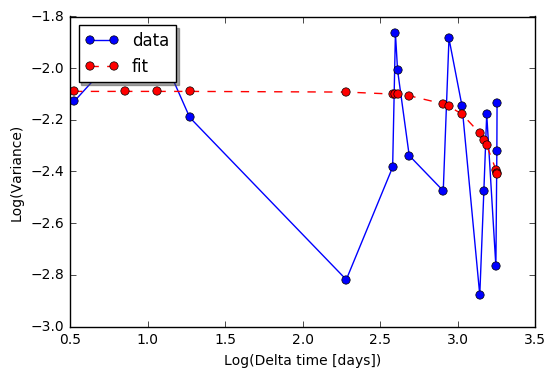

In [232]:
x_log=np.log10(Structure_Function_Log_Bins[:,0])
y_log=np.log10(Structure_Function_Log_Bins[:,1])
plt.plot(x_log,y_log,label='data',marker='o')
plt.plot(x_log,np.log10(fit_func(x,a,b)), 'r--',marker='o',label='fit')
legend = plt.legend(loc='upper left', shadow=True)
plt.xlabel('Log(Delta time [days])')
plt.ylabel('Log(Variance)')
fig = plt.gcf()
#plt.savefig(path_figs + 'LogOrLin.pdf', bbox_inches='tight')
plt.savefig(Invividual_LC_dir + 'SF.png', bbox_inches='tight')
plt.show()
plt.close()

# Total code

In [270]:
lc_dir=base_dir+"LC_Full/"
os.chdir(lc_dir)

data = ascii.read('ptf.ptf_lightcurves26083.tbl')

arr = np.empty((0,6), int)
TotalNumberOfLC=data[-1][0]
for nv in range(0,TotalNumberOfLC):
    print "Progres"+"\r{0}".format((float(nv)/(TotalNumberOfLC+1))*100),
    Invividual_LC_dir=lc_dir+str(nv)+"/"
    SingleLC=data[data['cntr_01']==nv]
    if len(SingleLC)>10:
        SingleLC_Clean=cleaning_LC(SingleLC)
        length_of_LC=len(SingleLC_Clean)
        if length_of_LC>10:
            if not os.path.exists(Invividual_LC_dir):
                os.makedirs(Invividual_LC_dir)
            #construct light curve    
            ligth_curve=np.sort(np.c_[np.ma.getdata(SingleLC_Clean['mag_autocorr']),np.ma.getdata(SingleLC_Clean['obsmjd'])])
            #very stupid way to change columns so that first collumn is date, second magnitude  
            helplc=np.copy(ligth_curve[:,0])
            ligth_curve[:,0]=ligth_curve[:,1]
            ligth_curve[:,1]=helplc
            ligth_curve_sort=ligth_curve[ligth_curve[:,0].argsort()]
            #remove observations for which the observed magnitude is below zero
            ligth_curve_sort=ligth_curve_sort[ligth_curve_sort[:,1]>0]
            #time difference between the first and the last observation
            time_duration_of_LC=ligth_curve_sort[-1][0]-ligth_curve_sort[0][0]
            #very rough cleaning of the light curve, employing 0.5 mag cut from the median light curve (5 observations wide bin)
            TimesAndDifferencesFromMedian=np.column_stack((ligth_curve_sort[:,0],ligth_curve_sort[:,1]-medfilt(ligth_curve_sort[:,1],5)))
            ligth_curve_sort_and_clean=ligth_curve_sort[np.abs(TimesAndDifferencesFromMedian[:,1])<0.5]
            #plot the light curve
            x_log=ligth_curve_sort_and_clean[:,0]
            y_log=ligth_curve_sort_and_clean[:,1]
            plt.errorbar(x_log, y_log,label=str(SingleLC_Clean[0][0]),marker='o')
            legend = plt.legend(loc='lower right', shadow=True)
            plt.xlabel('MJD')
            plt.ylabel('mag')
            plt.savefig(Invividual_LC_dir + 'LcWithError.png', bbox_inches='tight')
            #plt.show() - uncomment if you want to show the figure in this notebook
            plt.close()
            #computing SF**2
            array_of_magnitude_differences = [];
            for n in range(len(ligth_curve_sort_and_clean)-1):
                array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
            array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
            array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
            Structure_Function_Log_Bins = [];
            Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,5))
            for n in range(1,len(Array_Of_Log_Limits)-1):
                single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
                Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
            Structure_Function_Log_Bins=np.vstack(Structure_Function_Log_Bins)
            #Plot the SF**2
            x_log=array_of_magnitude_differences[:,0]
            y_log=array_of_magnitude_differences[:,1]
            x=Structure_Function_Log_Bins[:,0]
            y=Structure_Function_Log_Bins[:,1]
            x_log=np.log10(Structure_Function_Log_Bins[:,0])
            y_log=np.log10(Structure_Function_Log_Bins[:,1])
            params = curve_fit(fit_func, x, y)
            [a, b] = params[0]
            x_log=np.log10(Structure_Function_Log_Bins[:,0])
            y_log=np.log10(Structure_Function_Log_Bins[:,1])
            plt.plot(x_log,y_log,label='data',marker='o')
            plt.plot(x_log,np.log10(fit_func(x,a,b)), 'r--',marker='o',label='fit')
            legend = plt.legend(loc='lower right', shadow=True)
            plt.xlabel('Log(Delta time [days])')
            plt.ylabel('Log(Variance)')
            fig = plt.gcf()
            plt.savefig(Invividual_LC_dir + 'SF.png', bbox_inches='tight')
            #plt.show()  - uncomment if you want to show the figure in this notebook
            plt.close()
            #add the value in the numpy array
            arr = np.append(arr, np.array([[nv,a,b,len(ligth_curve_sort_and_clean),np.max(array_of_magnitude_differences[:,0]),np.median(SingleLC_Clean['referencemag'])]]), axis=0)

99.8938992042


In [271]:
# create pandas dataframe havign the summary of the analysis
summary=pd.DataFrame(data=arr[0:,1:],index=arr[0:,0],columns=['a','b','n_obsv','Delta_t','mag'])

In [272]:
summary

,a,b,n_obsv,Delta_t,mag
1.0,-2.680724e-08,0.040775,28.0,373.96306,19.424
6.0,-1.852071e-07,0.002414,62.0,337.09354,18.028
7.0,-4.449947e-09,0.010728,23.0,1406.26669,18.338
8.0,-3.541916e-09,0.015740,56.0,1507.14889,18.363
10.0,-6.104179e-05,0.036631,18.0,31.11950,17.751
11.0,-1.852526e-08,0.005603,22.0,434.01071,16.977
12.0,-1.828311e-08,0.008031,77.0,384.35496,18.526
13.0,-6.052254e-08,0.021532,62.0,392.97989,18.901
15.0,-4.578020e-08,0.019107,72.0,392.97989,18.993
16.0,1.200225e-06,0.026167,12.0,72.91513,19.612


In [274]:
summary.to_pickle('summary_df')

# Short analysis of results

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import math
import sys
import csv
import pandas as pd
import datetime
import socket
import pickle
print(socket.gethostname())
%matplotlib inline

def fit_func(x, a, b):
    return a*x**2 + b

if socket.gethostname()=='Osian':
    base_dir="/home/caplarn/Documents/Variability/PTFBeatriz/"
else:
    base_dir="/export/data1/caplarn/Documents/Variability/PTFBeatriz/"
    
print('Current time: '+str(datetime.datetime.now()))       

iapetus
Current time: 2017-04-18 09:58:38.118019


In [11]:
os.chdir(base_dir+'LC_Full/')
summary=pickle.load( open('summary_df', "rb" ) )

In [ ]:
# What values of variable 'a' are we looking for?
# I want that SF(100 days) is probably SF(100 days)>0.05 mag
# That means SF**2(100 days)>0.0025 mag**2
# That means a>0.000025 mag**2/day (a>2.5*10**-5)
# That means log10(a)>-4.6

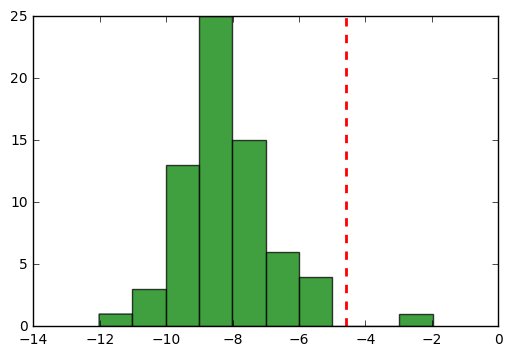

In [27]:
# the histogram of the data
n, bins, patches = plt.hist(np.log10(summary[summary['a']>0]['a'].values), 10, facecolor='green', alpha=0.75)
plt.axvline(x=-4.6, color='r', linestyle='dashed', linewidth=2)

In [39]:
weakcandidates=summary[np.log10(summary['a'].values)>-6]

In [60]:
lc_dir=base_dir+"LC_Full/"
os.chdir(lc_dir)
import os
from astropy.io import ascii

data = ascii.read('ptf.ptf_lightcurves26083.tbl')

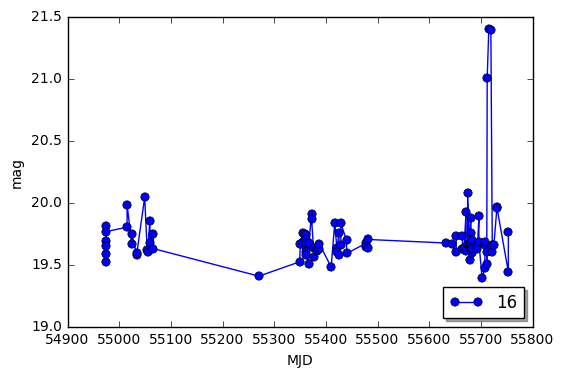

In [85]:
from scipy.signal import medfilt
SingleLC_Clean=data[data['cntr_01']==weakcandidates.index[0]]
ligth_curve=np.sort(np.c_[np.ma.getdata(SingleLC_Clean['mag_autocorr']),np.ma.getdata(SingleLC_Clean['obsmjd'])])
#very stupid way to change columns so that first collumn is date, second magnitude  
helplc=np.copy(ligth_curve[:,0])
ligth_curve[:,0]=ligth_curve[:,1]
ligth_curve[:,1]=helplc
ligth_curve_sort=ligth_curve[ligth_curve[:,0].argsort()]
#remove observations for which the observed magnitude is below zero
ligth_curve_sort=ligth_curve_sort[ligth_curve_sort[:,1]>0]
#time difference between the first and the last observation
time_duration_of_LC=ligth_curve_sort[-1][0]-ligth_curve_sort[0][0]
#very rough cleaning of the light curve, employing 0.5 mag cut from the median light curve (5 observations wide bin)
TimesAndDifferencesFromMedian=np.column_stack((ligth_curve_sort[:,0],ligth_curve_sort[:,1]-medfilt(ligth_curve_sort[:,1],5)))
ligth_curve_sort_and_clean=ligth_curve_sort[np.abs(TimesAndDifferencesFromMedian[:,1])<0.5]
#plot the light curve
x_log=ligth_curve_sort_and_clean[:,0]
y_log=ligth_curve_sort_and_clean[:,1]
plt.errorbar(x_log, y_log,label=str(SingleLC_Clean[0][0]),marker='o')
legend = plt.legend(loc='lower right', shadow=True)
plt.xlabel('MJD')
plt.ylabel('mag')

array_of_magnitude_differences = [];
for n in range(len(ligth_curve_sort_and_clean)-1):
    array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
Structure_Function_Log_Bins = [];
Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,5))
for n in range(1,len(Array_Of_Log_Limits)-1):
    single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
    Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
Structure_Function_Log_Bins1=np.vstack(Structure_Function_Log_Bins)

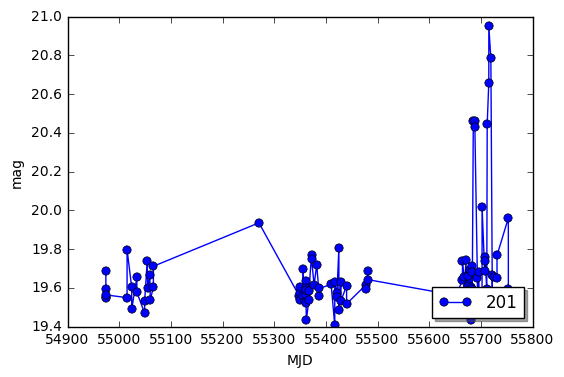

In [86]:
from scipy.signal import medfilt
SingleLC_Clean=data[data['cntr_01']==weakcandidates.index[1]]
ligth_curve=np.sort(np.c_[np.ma.getdata(SingleLC_Clean['mag_autocorr']),np.ma.getdata(SingleLC_Clean['obsmjd'])])
#very stupid way to change columns so that first collumn is date, second magnitude  
helplc=np.copy(ligth_curve[:,0])
ligth_curve[:,0]=ligth_curve[:,1]
ligth_curve[:,1]=helplc
ligth_curve_sort=ligth_curve[ligth_curve[:,0].argsort()]
#remove observations for which the observed magnitude is below zero
ligth_curve_sort=ligth_curve_sort[ligth_curve_sort[:,1]>0]
#time difference between the first and the last observation
time_duration_of_LC=ligth_curve_sort[-1][0]-ligth_curve_sort[0][0]
#very rough cleaning of the light curve, employing 0.5 mag cut from the median light curve (5 observations wide bin)
TimesAndDifferencesFromMedian=np.column_stack((ligth_curve_sort[:,0],ligth_curve_sort[:,1]-medfilt(ligth_curve_sort[:,1],5)))
ligth_curve_sort_and_clean=ligth_curve_sort[np.abs(TimesAndDifferencesFromMedian[:,1])<0.5]
#plot the light curve
x_log=ligth_curve_sort_and_clean[:,0]
y_log=ligth_curve_sort_and_clean[:,1]
plt.errorbar(x_log, y_log,label=str(SingleLC_Clean[0][0]),marker='o')
legend = plt.legend(loc='lower right', shadow=True)
plt.xlabel('MJD')
plt.ylabel('mag')

array_of_magnitude_differences = [];
for n in range(len(ligth_curve_sort_and_clean)-1):
    array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
Structure_Function_Log_Bins = [];
Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,5))
for n in range(1,len(Array_Of_Log_Limits)-1):
    single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
    Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
Structure_Function_Log_Bins2=np.vstack(Structure_Function_Log_Bins)

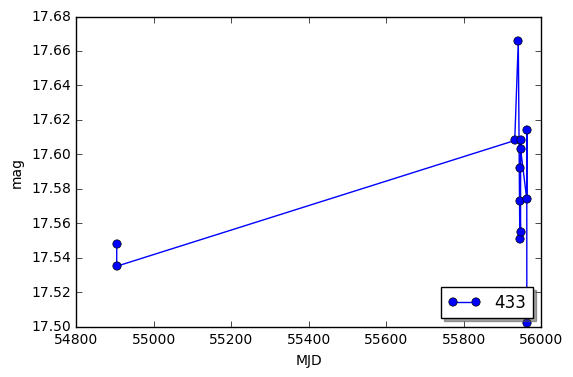

In [87]:
from scipy.signal import medfilt
SingleLC_Clean=data[data['cntr_01']==weakcandidates.index[2]]
ligth_curve=np.sort(np.c_[np.ma.getdata(SingleLC_Clean['mag_autocorr']),np.ma.getdata(SingleLC_Clean['obsmjd'])])
#very stupid way to change columns so that first collumn is date, second magnitude  
helplc=np.copy(ligth_curve[:,0])
ligth_curve[:,0]=ligth_curve[:,1]
ligth_curve[:,1]=helplc
ligth_curve_sort=ligth_curve[ligth_curve[:,0].argsort()]
#remove observations for which the observed magnitude is below zero
ligth_curve_sort=ligth_curve_sort[ligth_curve_sort[:,1]>0]
#time difference between the first and the last observation
time_duration_of_LC=ligth_curve_sort[-1][0]-ligth_curve_sort[0][0]
#very rough cleaning of the light curve, employing 0.5 mag cut from the median light curve (5 observations wide bin)
TimesAndDifferencesFromMedian=np.column_stack((ligth_curve_sort[:,0],ligth_curve_sort[:,1]-medfilt(ligth_curve_sort[:,1],5)))
ligth_curve_sort_and_clean=ligth_curve_sort[np.abs(TimesAndDifferencesFromMedian[:,1])<0.5]
#plot the light curve
x_log=ligth_curve_sort_and_clean[:,0]
y_log=ligth_curve_sort_and_clean[:,1]
plt.errorbar(x_log, y_log,label=str(SingleLC_Clean[0][0]),marker='o')
legend = plt.legend(loc='lower right', shadow=True)
plt.xlabel('MJD')
plt.ylabel('mag')

array_of_magnitude_differences = [];
for n in range(len(ligth_curve_sort_and_clean)-1):
    array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
Structure_Function_Log_Bins = [];
Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,5))
for n in range(1,len(Array_Of_Log_Limits)-1):
    single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
    Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
Structure_Function_Log_Bins3=np.vstack(Structure_Function_Log_Bins)

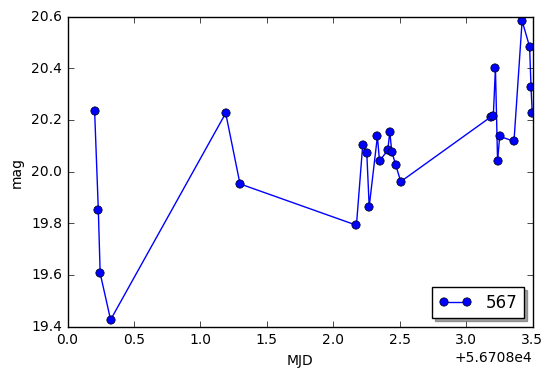

In [88]:
from scipy.signal import medfilt
SingleLC_Clean=data[data['cntr_01']==weakcandidates.index[3]]
ligth_curve=np.sort(np.c_[np.ma.getdata(SingleLC_Clean['mag_autocorr']),np.ma.getdata(SingleLC_Clean['obsmjd'])])
#very stupid way to change columns so that first collumn is date, second magnitude  
helplc=np.copy(ligth_curve[:,0])
ligth_curve[:,0]=ligth_curve[:,1]
ligth_curve[:,1]=helplc
ligth_curve_sort=ligth_curve[ligth_curve[:,0].argsort()]
#remove observations for which the observed magnitude is below zero
ligth_curve_sort=ligth_curve_sort[ligth_curve_sort[:,1]>0]
#time difference between the first and the last observation
time_duration_of_LC=ligth_curve_sort[-1][0]-ligth_curve_sort[0][0]
#very rough cleaning of the light curve, employing 0.5 mag cut from the median light curve (5 observations wide bin)
TimesAndDifferencesFromMedian=np.column_stack((ligth_curve_sort[:,0],ligth_curve_sort[:,1]-medfilt(ligth_curve_sort[:,1],5)))
ligth_curve_sort_and_clean=ligth_curve_sort[np.abs(TimesAndDifferencesFromMedian[:,1])<0.5]
#plot the light curve
x_log=ligth_curve_sort_and_clean[:,0]
y_log=ligth_curve_sort_and_clean[:,1]
plt.errorbar(x_log, y_log,label=str(SingleLC_Clean[0][0]),marker='o')
legend = plt.legend(loc='lower right', shadow=True)
plt.xlabel('MJD')
plt.ylabel('mag')

array_of_magnitude_differences = [];
for n in range(len(ligth_curve_sort_and_clean)-1):
    array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
Structure_Function_Log_Bins = [];
Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,5))
for n in range(1,len(Array_Of_Log_Limits)-1):
    single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
    Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
Structure_Function_Log_Bins4=np.vstack(Structure_Function_Log_Bins)

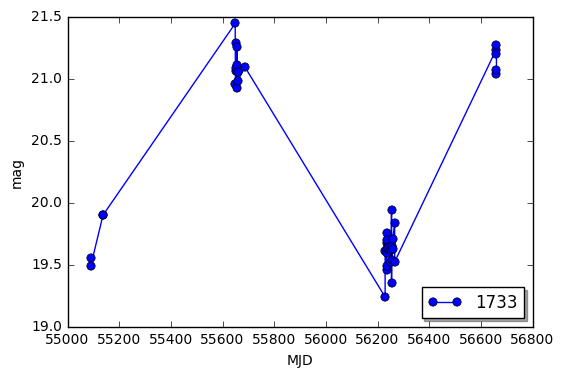

In [90]:
from scipy.signal import medfilt
SingleLC_Clean=data[data['cntr_01']==weakcandidates.index[4]]
ligth_curve=np.sort(np.c_[np.ma.getdata(SingleLC_Clean['mag_autocorr']),np.ma.getdata(SingleLC_Clean['obsmjd'])])
#very stupid way to change columns so that first collumn is date, second magnitude  
helplc=np.copy(ligth_curve[:,0])
ligth_curve[:,0]=ligth_curve[:,1]
ligth_curve[:,1]=helplc
ligth_curve_sort=ligth_curve[ligth_curve[:,0].argsort()]
#remove observations for which the observed magnitude is below zero
ligth_curve_sort=ligth_curve_sort[ligth_curve_sort[:,1]>0]
#time difference between the first and the last observation
time_duration_of_LC=ligth_curve_sort[-1][0]-ligth_curve_sort[0][0]
#very rough cleaning of the light curve, employing 0.5 mag cut from the median light curve (5 observations wide bin)
TimesAndDifferencesFromMedian=np.column_stack((ligth_curve_sort[:,0],ligth_curve_sort[:,1]-medfilt(ligth_curve_sort[:,1],5)))
ligth_curve_sort_and_clean=ligth_curve_sort[np.abs(TimesAndDifferencesFromMedian[:,1])<0.5]
#plot the light curve
x_log=ligth_curve_sort_and_clean[:,0]
y_log=ligth_curve_sort_and_clean[:,1]
plt.errorbar(x_log, y_log,label=str(SingleLC_Clean[0][0]),marker='o')
legend = plt.legend(loc='lower right', shadow=True)
plt.xlabel('MJD')
plt.ylabel('mag')

array_of_magnitude_differences = [];
for n in range(len(ligth_curve_sort_and_clean)-1):
    array_of_magnitude_differences.append(ligth_curve_sort_and_clean[n]-ligth_curve_sort_and_clean[n+1:])
array_of_magnitude_differences=np.vstack(array_of_magnitude_differences)
array_of_magnitude_differences[:,0]=array_of_magnitude_differences[:,0]*(-1)
Structure_Function_Log_Bins = [];
Array_Of_Log_Limits=np.percentile(np.log10(array_of_magnitude_differences[:,0]),range(0,100,5))
for n in range(1,len(Array_Of_Log_Limits)-1):
    single_bin=array_of_magnitude_differences[((Array_Of_Log_Limits[n])<=(np.log10(array_of_magnitude_differences[:,0])))&((np.log10(array_of_magnitude_differences[:,0]))<=Array_Of_Log_Limits[n+1])]   
    Structure_Function_Log_Bins.append([np.mean(single_bin[:,0]),np.var(single_bin[:,1])])
Structure_Function_Log_Bins5=np.vstack(Structure_Function_Log_Bins)

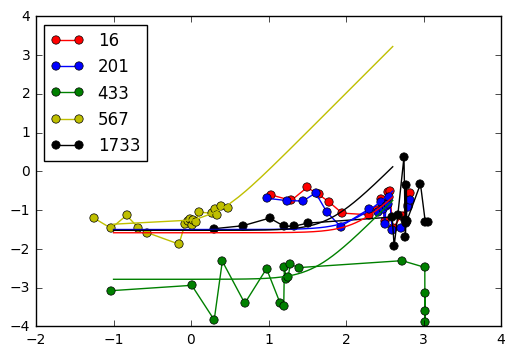

In [109]:
# lets look at the data

t = np.linspace(0.1,400,400)
f1=np.log10(fit_func(t, weakcandidates.iat[0,0], weakcandidates.iat[0,1]))
f2=np.log10(fit_func(t, weakcandidates.iat[1,0], weakcandidates.iat[1,1]))
f3=np.log10(fit_func(t, weakcandidates.iat[2,0], weakcandidates.iat[2,1]))
f4=np.log10(fit_func(t, weakcandidates.iat[3,0], weakcandidates.iat[3,1]))
f5=np.log10(fit_func(t, weakcandidates.iat[4,0], weakcandidates.iat[4,1]))

x1_log=np.log10(Structure_Function_Log_Bins1[:,0])
y1_log=np.log10(Structure_Function_Log_Bins1[:,1])
plt.plot(x1_log,y1_log,label='16',marker='o',color='r')
x2_log=np.log10(Structure_Function_Log_Bins2[:,0])
y2_log=np.log10(Structure_Function_Log_Bins2[:,1])
plt.plot(x2_log,y2_log,label='201',marker='o',color='b')
x3_log=np.log10(Structure_Function_Log_Bins3[:,0])
y3_log=np.log10(Structure_Function_Log_Bins3[:,1])
plt.plot(x3_log,y3_log,label='433',marker='o',color='g')
x4_log=np.log10(Structure_Function_Log_Bins4[:,0])
y4_log=np.log10(Structure_Function_Log_Bins4[:,1])
plt.plot(x4_log,y4_log,label='567',marker='o',color='y')
x5_log=np.log10(Structure_Function_Log_Bins5[:,0])
y5_log=np.log10(Structure_Function_Log_Bins5[:,1])
plt.plot(x5_log,y5_log,label='1733',marker='o',color='black')

plt.gca().set_color_cycle(['r', 'b', 'g', 'y','black'])
plt.plot(np.log10(t), f1, np.log10(t), f2, np.log10(t), f3, np.log10(t), f4, np.log10(t), f5)
plt.legend(['16', '201', '433', '567','1733'], loc='upper left')
plt.show()


In [ ]:
# fit with index which can be adjusted
# see what is good way to find AGN (some simulation needed)

In [110]:
ligth_curve_sort_and_clean

array([[  5.50894444e+04,   1.95540000e+01],
       [  5.50894890e+04,   1.94840000e+01],
       [  5.51373231e+04,   1.98970000e+01],
       [  5.51373676e+04,   1.98980000e+01],
       [  5.56491506e+04,   2.14440000e+01],
       [  5.56501789e+04,   2.09590000e+01],
       [  5.56531573e+04,   2.10600000e+01],
       [  5.56532216e+04,   2.10840000e+01],
       [  5.56541744e+04,   2.12830000e+01],
       [  5.56542191e+04,   2.11110000e+01],
       [  5.56551995e+04,   2.12550000e+01],
       [  5.56562512e+04,   2.09270000e+01],
       [  5.56582296e+04,   2.10490000e+01],
       [  5.56582738e+04,   2.09800000e+01],
       [  5.56871939e+04,   2.10910000e+01],
       [  5.62294667e+04,   1.92380000e+01],
       [  5.62295046e+04,   1.96050000e+01],
       [  5.62353011e+04,   1.94550000e+01],
       [  5.62364783e+04,   1.94890000e+01],
       [  5.62365497e+04,   1.97520000e+01],
       [  5.62374611e+04,   1.96710000e+01],
       [  5.62375328e+04,   1.95910000e+01],
       [  